# Домашнее задание 6

Добро пожаловать на шестое домашнее задание! В нем Вам предлагается пройти полный путь по решению задачи бинарной классификации: 
* очистка таблицы от некорректных данных и пропусков

* разработка базовой модели классификации

* модификация решения и поиск наилучшей конфигурации модели **ID3** 

В данном домашнем задании Вам предлагается создать своего умного подсказччика для терапевта, который умеет определять **Ветрянку**.
Давайте посмотрим на предложенный набор данных!

In [6]:
import pandas as pd
df = pd.read_csv("chickenpox.csv", index_col = 0)

In [7]:
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,ж,184,да,нет,нет
1.0,25,м,166,да,нет,нет
2.0,12,ж,115,нет,да,нет
3.0,6,м,85,да,да,нет
4.0,2,м,116,нет,да,да
...,...,...,...,...,...,...
995.0,6,м,92,нет,да,да
996.0,5,м,121,да,да,да
997.0,20,ж,158,да,да,нет


Таблица содерижит информацию о людях, которые болет или не болет Ветрянкой

**Ветрянка** -- Человек болеет Ветрянкой | **Да**,  **Нет** 

**Возраст** -- Возраст человека

**Пол** -- Пол человека | **м**,  **ж** 

**Рост_см** -- Рост человека в см.

**Родители_болели_ветрянкой** -- Болели ли родители человека Ветрянкой | **Да**,  **Нет** 

**Домашний_питомец** -- Есть ли у человека домашний питомец | **Да**,  **Нет** 


### Признаки предикторы

* **Возраст**
* **Рост_см**
* **Пол**
* **Родители_болели_ветрянкой**
* **Домашний_питомец**

### Целевой признак

* **Ветрянка**

# Задание 1: Очистка таблицы от некорректных данных и пропусков

Удалите из таблицы данные, которые могут содержать:

* промущенные значения null
* рост человека больше 2 метров
* возраст человека больше 100 лет

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 999 entries, 0.0 to 999.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    999 non-null    int64 
 1   Пол                        992 non-null    object
 2   Рост_см                    999 non-null    int64 
 3   Родители_болели_ветрянкой  999 non-null    object
 4   Домашний_питомец           990 non-null    object
 5   Ветрянка                   999 non-null    object
dtypes: int64(2), object(4)
memory usage: 54.6+ KB


In [9]:
df = df.drop(df[df['Пол'].isna()].index)

In [10]:
df = df.drop(df[df['Домашний_питомец'].isna()].index)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 983 entries, 0.0 to 999.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    983 non-null    int64 
 1   Пол                        983 non-null    object
 2   Рост_см                    983 non-null    int64 
 3   Родители_болели_ветрянкой  983 non-null    object
 4   Домашний_питомец           983 non-null    object
 5   Ветрянка                   983 non-null    object
dtypes: int64(2), object(4)
memory usage: 53.8+ KB


In [12]:
df.describe()

,Возраст,Рост_см
count,983.000000,983.000000
mean,19.174975,148.144456
std,38.322911,88.526288
min,1.000000,80.000000
25%,7.000000,104.000000
50%,15.000000,140.000000
75%,21.000000,174.000000
max,395.000000,994.000000


In [13]:
df = df.drop(df[df['Возраст']>100].index)

In [14]:
df = df.drop(df[df['Рост_см']>200].index)

In [15]:
df.describe()

,Возраст,Рост_см
count,948.000000,948.000000
mean,13.797468,138.227848
std,7.810528,37.315216
min,1.000000,80.000000
25%,7.000000,104.000000
50%,12.000000,137.000000
75%,21.000000,173.250000
max,25.000000,199.000000


# Задание 2: Замена переменных

Сделайте замену пременных по следующем принципу:

* **Ветрянка** : да --> 1, нет --> 0
* **Родители_болели_ветрянкой** : да --> 1, нет --> 0
* **Домашний_питомец** : да --> 1, нет --> 0
* **Пол** : м --> 1, ж --> 0

проверьте, что после замены переменных у вас столбцы стали численными.

In [16]:
df['Ветрянка'] = df['Ветрянка'].map({'да' : 1,'нет' : 0})

In [17]:
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,ж,184,да,нет,0
1.0,25,м,166,да,нет,0
2.0,12,ж,115,нет,да,0
3.0,6,м,85,да,да,0
4.0,2,м,116,нет,да,1
...,...,...,...,...,...,...
995.0,6,м,92,нет,да,1
996.0,5,м,121,да,да,1
997.0,20,ж,158,да,да,0


In [18]:
df['Родители_болели_ветрянкой'] = df['Родители_болели_ветрянкой'].map({'да' : 1,'нет' : 0})
df['Домашний_питомец'] = df['Домашний_питомец'].map({'да' : 1,'нет' : 0})
df['Пол'] = df['Пол'].map({'м' : 1,'ж' : 0})

In [19]:
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,0,184,1,0,0
1.0,25,1,166,1,0,0
2.0,12,0,115,0,1,0
3.0,6,1,85,1,1,0
4.0,2,1,116,0,1,1
...,...,...,...,...,...,...
995.0,6,1,92,0,1,1
996.0,5,1,121,1,1,1
997.0,20,0,158,1,1,0


# Задание 3: Тренировочный и валидационный датасеты

Разбейте датасет на две части в соотношении 9 (тренировочный) к 1 (валидационный)

In [20]:
df_train = df.iloc[0:int(len(df)*0.9)]
df_val = df.iloc[int(len(df)*0.9):]

# Задание 4: Модель ID3

Натренируйте базовую модель **ID3** на тренировочном датасете с гиперпарамметрами: random_state=0, criterion = "entropy"
Оцените ее качество на валидационном датасете с помощью метрики **F1_score**

In [21]:
predictors_cols = df_train.drop(['Ветрянка'],axis=1).columns

In [22]:
print(predictors_cols)

Index(['Возраст', 'Пол', 'Рост_см', 'Родители_болели_ветрянкой',
       'Домашний_питомец'],
      dtype='object')


In [24]:
X_train = df_train[predictors_cols]
y_train = df_train['Ветрянка']

X_val = df_val[predictors_cols]
y_val = df_val['Ветрянка']

In [25]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0)

In [26]:
clf = clf.fit(X_train,y_train)

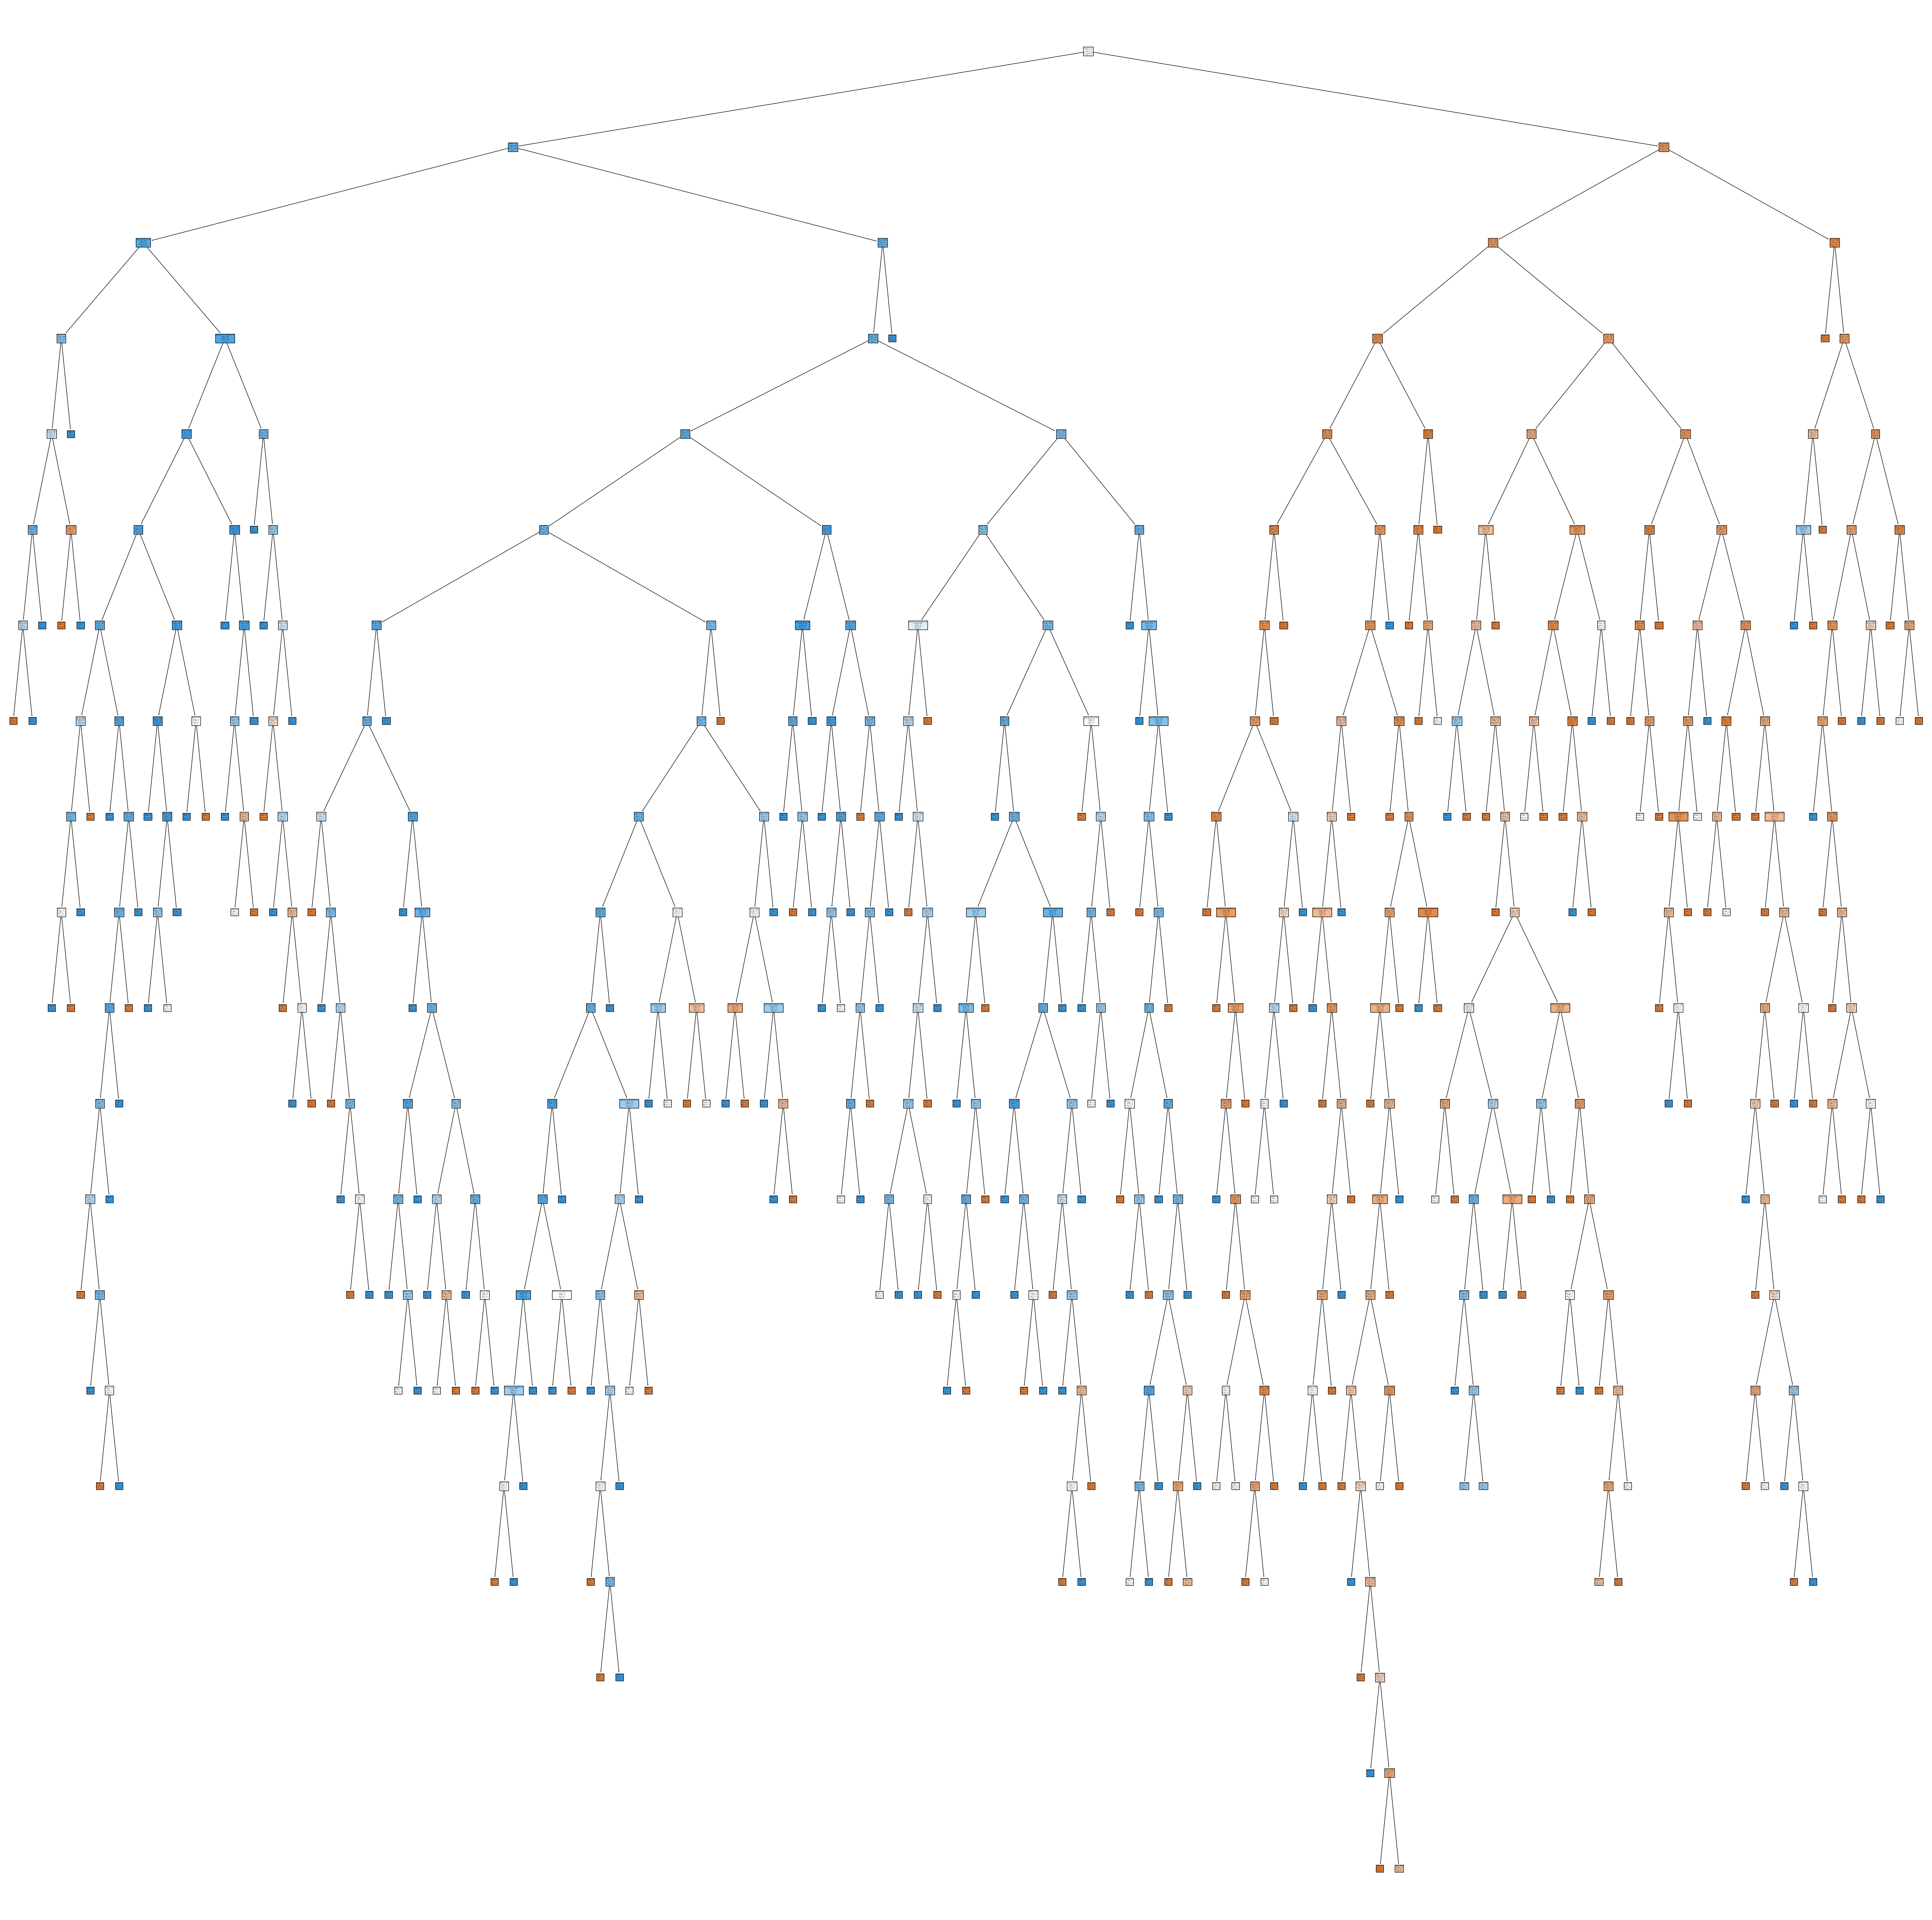

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,70))
tree.plot_tree(clf, feature_names=predictors_cols,  
                   class_names=['1','0'],
                   filled=True)
plt.show()

In [30]:
from sklearn.metrics import f1_score
predict = clf.predict(X_val)
print(f1_score(y_val, predict))

0.7291666666666666


# Задание 5: Поиск лучшей конфигурации

Переберите различные гиперпарамметры для модели **ID3** и найдите наилучшую кофингурации модели по метрике **F1_score**

Затем обучите наилучшую кофингурации модели и примените ее на валидацинном датасете. Сохраните предсказание модели в отдельный столбец в валидационном датасете. Для создания новых моделей **обязательно** используйте random_state=0.

<code>max_depths = [3, 5, 9, 17, 20, len(df_train)]<code>

In [32]:
max_depths = [i for i in range(1,len(df_train))]

In [33]:
def tree_fit_predict_f1(df_TRAIN,df_VAL,predictors_cols_names,answer_col_name,max_depth):
    X_train = df_TRAIN[predictors_cols_names]
    y_train = df_TRAIN[answer_col_name]
    
    X_val = df_VAL[predictors_cols_names]
    y_val = df_VAL[answer_col_name]
    
    clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0,max_depth=max_depth)
    clf = clf.fit(X_train,y_train)
    
    prediction = clf.predict(X_val)
    
    return f1_score(y_val,prediction)

In [34]:
max_d = 1
max_f1 = 0
for i in max_depths:
    temp = tree_fit_predict_f1(df_train,df_val,predictors_cols,'Ветрянка',i)
    if temp > max_f1:
        max_f1 = temp
        max_d = i
print(max_d,max_f1)

1 0.875


In [35]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0,max_depth=1)
clf = clf.fit(X_train,y_train)
    

    

In [36]:
df_val

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
901.0,21,0,158,1,0,0
902.0,11,1,123,0,1,1
903.0,4,0,136,0,0,0
905.0,23,0,162,1,0,0
906.0,15,0,197,0,0,0
...,...,...,...,...,...,...
995.0,6,1,92,0,1,1
996.0,5,1,121,1,1,1
997.0,20,0,158,1,1,0


In [42]:

prediction = clf.predict(X_val)
df_val['Prediction'] = prediction

C:\Users\Alex\AppData\Local\Temp\ipykernel_12220\1653621681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Prediction'] = prediction


In [43]:

df_new = df_val["Prediction"]

df_new.to_csv("h6_answer_prod.csv")

И так, поздравляем, Вы выполнили шестое домашнее задание!

Теперь осталось чуть-чуть...

На платформу Школково Вам нужно будет загрузить таблицу с предсказаниями вашей лучшей модели на валидационном датасете

Чтобы сделать это, выполните ячейку выше. Тем самым Вы получите нужную таблицу. Загрузите ее на платформу Школково.